# Document Similarity

In this notebook, you will use the DocumentSimilarity tool to identify similar documents and decide whether to keep or remove them from the corpus.  

**Note:** this tool uses [MinHash](https://ekzhu.com/datasketch/minhash.html) to estimate the Jaccard similarity between sets of documents. MinHash is introduced by Andrei Z. Broder in this [paper](https://cs.brown.edu/courses/cs253/papers/nearduplicate.pdf).

<div class="alert alert-block alert-warning">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

## 1. Setup
Before you begin, you need to import the DocumentSimilarity package and the necessary libraries and initiate them to run in this notebook.

In [1]:
# import the DocumentSimilarity tool
print('Loading DocumentSimilarity...')
print('Finished loading.')
from document_similarity import DocumentSimilarity, DownloadFileLink

# initialize the DocumentSimilarity
ds = DocumentSimilarity()

Loading DocumentSimilarity...
Finished loading.


## 2. Load the data
This notebook will allow you upload text data in a text file (or a number of text files). Alternatively, you can also upload text inside a text column inside your excel spreadsheet ([see an example here](https://github.com/Sydney-Informatics-Hub/HASS-29_Quotation_Tool/blob/main/documents/sample_texts.xlsx)).  

<table style='margin-left: 10px'><tr>
<td> <img src='./img/txt_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/xlsx_icon.png' style='width: 55px'/> </td>
<td> <img src='./img/csv_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/zip_icon.png' style='width: 45px'/> </td>
</tr></table>

<div class="alert alert-block alert-warning">
<b>Uploading your text files</b> 
    
If you have a large number of text files (more than 10MB in total), we suggest you compress (zip) them and upload the zip file instead. If you need assistance on how to compress your file, please check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-danger">
<b>Large file upload</b> 
    
If you have ongoing issues with the file upload, please re-launch the notebook via Binder again. If the issue persists, consider restarting your computer.
</div>

In [2]:
# upload the text files and/or excel spreadsheets onto the system
display(ds.upload_box)
print('Uploading large files may take a while. Please be patient.')

Uploading large files may take a while. Please be patient.


In [3]:
# display uploaded text
n=5

ds.text_df.head(n)

,text_name,text,text_id
0,Advertiser_2014_09_0016_Television,Television\nFOXTEL HIGHLIGHTS REALITY THE WORL...,d8580c2fcc
1,Advertiser_2014_06_0034_Bs-newsflash,B+s newsflash\n3.2 mil THAT'S HOW MANY CENTENA...,e74c333266
2,Advertiser_2015_11_0029_Mums-fail-to-keep-abre...,Mums fail to keep abreast of formula\nMUMS are...,384c9887bc
3,Advertiser_2014_03_0002_Bs-newsflash,B+s newsflash\n100 CIGARETTES INCREASES BREAST...,1f37ab343c
4,Advertiser_2016_01_0007_Dont-sweat-it,Don't sweat it\nExcessive perspiration causing...,9aaaf6a8df


## 3. Calculate Document Similarity
Once your texts have been uploaded, you can begin to calculate the similarity between documents in the corpus. 

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- MinHash: fast implementation of estimating Jaccard similarity between documents in the corpus.
</div>

<div class="alert alert-block alert-danger">
<b>Memory limitation in Binder</b> 
    
The free Binder deployment is only guaranteed a maximum of 2GB memory. Processing very large text files may cause the session (kernel) to re-start due to insufficient memory. Check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-warning">
<b>Parameters for calculating similarity</b> 
    
The DocumentSimilarity tool uses Jaccard similarity to measure the similarity between documents. In the below, we have specified the default parameters for calculating the Jaccard similarity. However, you can also change these parameters should you wish. 
</div>

In [7]:
# USER SPECIFIES THESE VARIABLES
# set the n-gram size (the number of words used to detect similarity), 
# e.g., n-gram=1 means compare every word ('apple' and 'orange'), 
# n-gram=2 means compare every pair of words ('one apple' and 'two oranges'), etc.
ngram_value = 1

# select whether to calculate actual or estimated Jaccard similarity 
# to measure the similarity between documents 
# we recommend using estimated Jaccard similarity for large corpus of documents (faster)
actual_jaccard = False # True or False

# set the number of permutation functions (num_perm) parameter for estimating Jaccard similarity
# higher permutation functions improves the accuracy, but also increases query cost
num_perm = 256

# anything with >= the cutoff will be identified as similar documents
similarity_cutoff = 0.1 # value should be between 0-1

In [ ]:
# begin the process of calculating similarity and identify similar documents
ds.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)

Step 1/9...


100%|███████████████████████████████████████| 699/699 [00:00<00:00, 2392.53it/s]


Step 2/9...


100%|████████████████████████████████████████| 699/699 [00:02<00:00, 252.26it/s]


Step 3/9...


100%|███████████████████████████████████████| 699/699 [00:00<00:00, 3722.40it/s]


Step 4/9...


100%|███████████████████████████████████████| 699/699 [00:00<00:00, 4395.42it/s]


Step 5/9...


100%|█████████████████████████████████████████| 699/699 [03:49<00:00,  3.04it/s]


Step 6/9...


100%|█████████████████████████████████████| 699/699 [00:00<00:00, 120063.00it/s]


Step 7/9...


100%|██████████████████████████████████████| 699/699 [00:00<00:00, 59999.56it/s]


Step 8/9...


 38%|█████████████                     | 110148/286762 [01:36<04:19, 681.00it/s]

## 3. Analyse similar documents
Once the tool has finished calculating the document similarity, you can begin to analyse the outcome.  

In the below, you can see a histogram of the number of similarity documents found in the corpus. Using this histogram, you can identify how many documents are found at different level of similarity measure, as measured by the Jaccard similarity.

Text(0.5, 1.0, 'Similarity count accross the entire corpus')

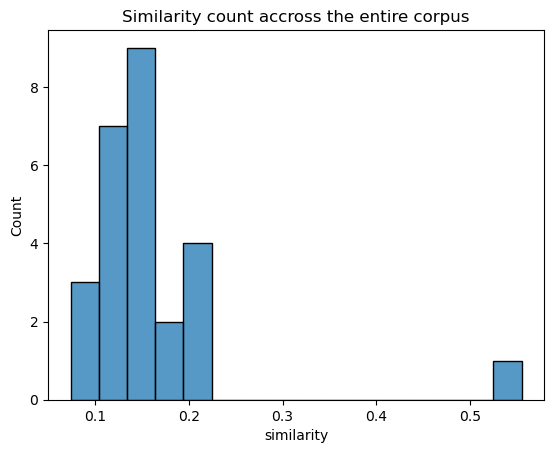

In [6]:
# plot the similarity count accross the entire corpus
ds.plot_hash_similarity_by_source(ds.deduplication_df)

<div class="alert alert-block alert-danger">
<b>Analyse similar documents</b> 

In the below, you can generate a list of similar documents (in pair) found by the tool, based on the similarity cutoff specified earlier. By default, the tool makes recommendation on whether to 'keep' or 'remove' each similar document (the tool will recommend to remove the document with the lower word count, if the Jaccard similarity is above the specified threshold). However, using the below tool, you can generate each pair of similar documents (by specifying the row index you wish to analyse), analyse them, and update the action/recommendation as you see fit.
</div>




<div class="alert alert-block alert-warning">
<b>What information is included in the below table?</b> 

**text_id1/2:** the text id of the pair of similar documents.
    
**text_name1/2:** the text name of the pair of similar documents.
   
**word_count1/2:** the word count of the pair of similar documents.

**status1/2:** whether to 'keep' or 'remove' each similar document.

**similarity:** the Jaccard similarity between the pair of similar documents.
</div>

In [ ]:
ds.display_deduplication_text()

## 5. Save non-duplicated texts
Once you are happy with the list of texts that you want to keep, you can run the below code to save the non-duplicated text (those with 'keep' status) into a zip of text (.txt) files and download them to your local computer.

In [ ]:
n=5

ds.finalise_and_save(n)